In this dataset we will identify the the status of VISA using the Decision Tree technique

### Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import the dataset

In [2]:
df=pd.read_csv('Visadataset.csv')

In [3]:
# First 5 records
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# Last 5 records
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [5]:
# Drop the first column case_id since it has no impact on out analysis
df=df.drop('case_id',axis=1)
df.sample(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
15798,Asia,Bachelor's,Y,N,1448,1975,Northeast,22336.01,Year,Y,Denied
7579,Europe,Master's,Y,Y,3117,2007,Midwest,126912.71,Year,Y,Certified
490,Asia,Master's,N,N,3697,2001,West,64422.65,Year,Y,Denied


In [6]:
# Total summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


From the above information we could see there are totally 25480 records and 11 features among them we don't have any null records

In [7]:
# Check the null values
df.isnull().sum().sum()

0

In [8]:
# check the duplicate values
df[df.duplicated()==True]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


We could see there are no duplicate records in the dataset

In [9]:
# Statistical analysis
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


## Categorical features and Numerical features

In [10]:
cat_col=[]
num_col=[]
for i in df.columns:
    if(df[i].dtype=='O'):
        cat_col.append(i)
    else:
        num_col.append(i)

In [11]:
cat_col

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [12]:
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

### Unique features of all categorical columns

In [13]:
df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [14]:
df['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [15]:
df['has_job_experience'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
df['requires_job_training'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
df['region_of_employment'].unique()

array(['West', 'Northeast', 'South', 'Midwest', 'Island'], dtype=object)

In [18]:
df['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [19]:
df['full_time_position'].unique()

array(['Y', 'N'], dtype=object)

In [20]:
df['full_time_position'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
df['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

### Distribution of visa applications 

In [22]:
df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

We could observe majority of the visa applications are from Asia and minorly from Oceania 

In [23]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

We could observe out off 25480 applications 17018 applications were certified and 8462 applications were denied

In [25]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

We could observe majorly Bachelors and Masters degree employees are applying more for Visas than those who completed only High school and Doctorate

In [26]:
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

We could observe experienced candidates are more than the freshers

In [27]:
df['region_of_employment'].value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

We could observe significant number of people are from all the regioins and insignificant number of candidates from Island

In [28]:
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

We could observe majority of the employees are inmterested in yearly based contract jobs than weekly and monthly based wage. And some significant number of candidates are interested in hourly based as well

In [29]:
df['full_time_position'].value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64

As we observed above employees are more interest in full time jobs rather than part time jobs

In [30]:
# We will copy the data 
df_copy=df.copy()

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    df_copy[i]=le.fit_transform(df_copy[i])

In [32]:
df_copy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0


In [33]:
# correlation
df_copy.corr()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,1.000000,0.000813,-0.005431,0.035175,0.009647,-0.027108,0.053707,-0.108609,-0.089615,0.007234,0.017606
education_of_employee,0.000813,1.000000,0.010948,-0.052972,0.016189,-0.006935,-0.104824,0.047208,0.029335,-0.158681,-0.100919
has_job_experience,-0.005431,0.010948,1.000000,-0.112195,0.007829,0.000821,0.020860,-0.016216,0.125457,0.041964,-0.192162
requires_job_training,0.035175,-0.052972,-0.112195,1.000000,-0.005545,-0.006490,0.114433,0.054945,0.083720,0.104590,-0.008423
no_of_employees,0.009647,0.016189,0.007829,-0.005545,1.000000,-0.017770,0.011801,-0.009523,0.019549,-0.010472,-0.008677
yr_of_estab,-0.027108,-0.006935,0.000821,-0.006490,-0.017770,1.000000,-0.003968,0.012342,0.042375,0.009318,-0.008597
region_of_employment,0.053707,-0.104824,0.020860,0.114433,0.011801,-0.003968,1.000000,-0.103105,-0.013402,0.031202,0.053490
prevailing_wage,-0.108609,0.047208,-0.016216,0.054945,-0.009523,0.012342,-0.103105,1.000000,0.416986,-0.197729,-0.076198
unit_of_wage,-0.089615,0.029335,0.125457,0.083720,0.019549,0.042375,-0.013402,0.416986,1.000000,-0.099309,-0.207528
full_time_position,0.007234,-0.158681,0.041964,0.104590,-0.010472,0.009318,0.031202,-0.197729,-0.099309,1.000000,0.012711


In [34]:
X=df_copy.drop('case_status',axis=1)
y=df_copy['case_status']

In [35]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,1,2,0,0,14513,2007,4,592.2029,0,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1
2,1,0,0,1,44444,2008,4,122996.8600,3,1
3,1,0,0,0,98,1897,4,83434.0300,3,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1


In [36]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: case_status, dtype: int32

In [37]:
X.shape,y.shape

((25480, 10), (25480,))

### Train Test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((20384, 10), (20384,), (5096, 10), (5096,))

## Training the Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0,criterion='gini')
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Accuracy of train data

In [47]:
from sklearn.metrics import accuracy_score

In [43]:
model.score(X_train,y_train)

1.0

### Accuracy of a test data

In [46]:
pred_test=model.predict(X_test)
pred_test

array([0, 0, 1, ..., 1, 0, 0])

In [48]:
accuracy_score(y_test, pred_test)

0.6424646781789639

### We could observe that model is well fitted with the train data but badly fitted with test data so out model is overfitted model

## Visualization of our Decision Tree Model

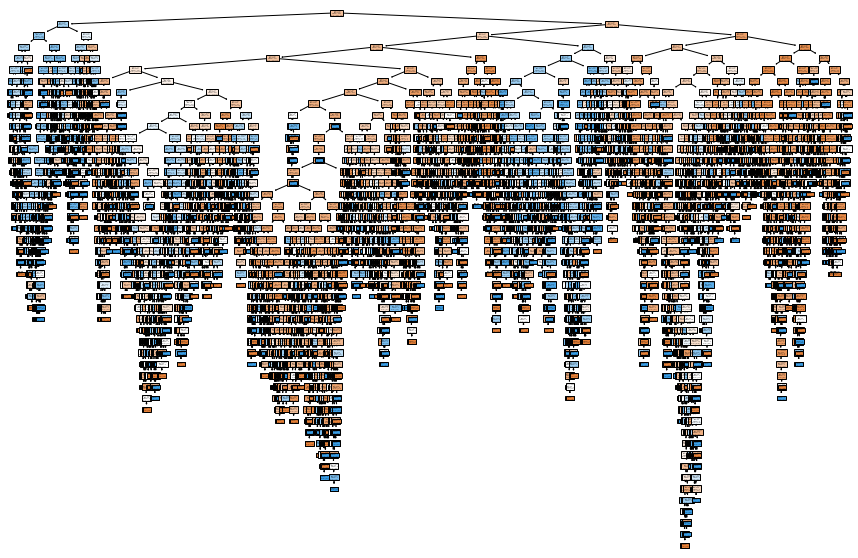

In [49]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [67]:
model.get_depth()

47

### Evaluation of Test Dataset

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3385
           1       0.47      0.48      0.47      1711

    accuracy                           0.64      5096
   macro avg       0.60      0.60      0.60      5096
weighted avg       0.64      0.64      0.64      5096



In [54]:
print(confusion_matrix(y_test,pred_test))

[[2451  934]
 [ 888  823]]


### Evaluation of train dataset

In [55]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13633
           1       1.00      1.00      1.00      6751

    accuracy                           1.00     20384
   macro avg       1.00      1.00      1.00     20384
weighted avg       1.00      1.00      1.00     20384



In [57]:
print(confusion_matrix(y_train,model.predict(X_train)))

[[13633     0]
 [    0  6751]]


### ROC curve for our Decision Tree Model

In [58]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [59]:
dt_probs = model.predict_proba(X_test)[:,1]

In [60]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)

In [61]:
auc_score_dt = auc(fpr_dt,tpr_dt)

In [62]:
auc_score_dt

0.6025410347676473

In [63]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

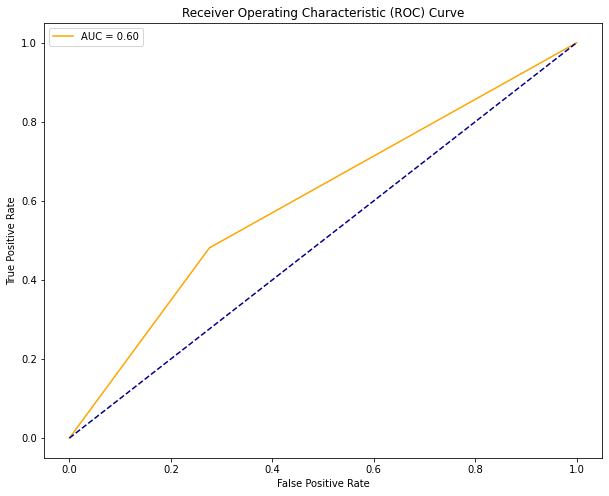

In [64]:
plot_roc_curve(fpr_dt,tpr_dt)

## Solving Overfitting Issue Using Pruning

In [66]:
path=model.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.00000000e+00, 2.40480808e-05, 2.80331913e-05, ...,
       6.77749918e-03, 7.72919714e-03, 1.87732758e-02])

In [68]:
len(alphas)

1876

In [69]:
alphas.min(),alphas.max()

(0.0, 0.018773275826540054)

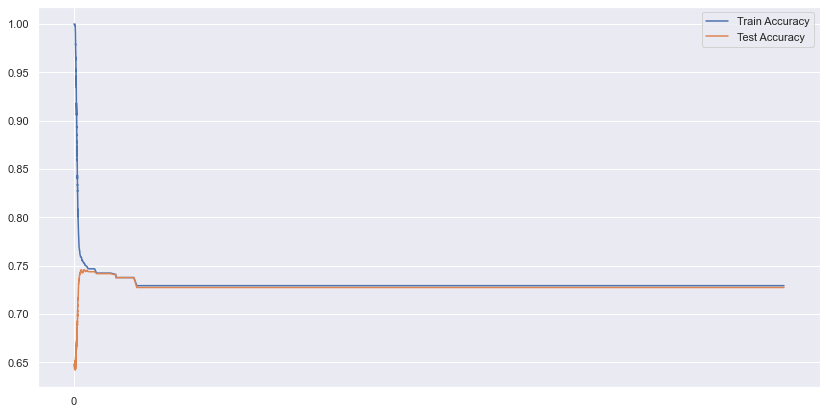

In [77]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    model=DecisionTreeClassifier(ccp_alpha=i)
    
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.01,0.02))
plt.show()

In [81]:
model = DecisionTreeClassifier(ccp_alpha=0.0012,random_state=40)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.7377354788069074 0.7376373626373627


We could see now both model is performing eqaully on both train and test data. So now our model is fitted model

[Text(482.8846153846154, 516.4200000000001, 'X[8] <= 0.5\ngini = 0.443\nsamples = 20384\nvalue = [13633, 6751]'),
 Text(418.5, 462.06000000000006, 'gini = 0.457\nsamples = 1720\nvalue = [608, 1112]'),
 Text(547.2692307692308, 462.06000000000006, 'X[1] <= 2.5\ngini = 0.422\nsamples = 18664\nvalue = [13025, 5639]'),
 Text(386.3076923076923, 407.70000000000005, 'X[1] <= 1.5\ngini = 0.468\nsamples = 11532\nvalue = [7234, 4298]'),
 Text(257.53846153846155, 353.34000000000003, 'X[1] <= 0.5\ngini = 0.419\nsamples = 9110\nvalue = [6388, 2722]'),
 Text(193.15384615384616, 298.98, 'X[2] <= 0.5\ngini = 0.449\nsamples = 7449\nvalue = [4917, 2532]'),
 Text(128.76923076923077, 244.62, 'X[6] <= 1.5\ngini = 0.494\nsamples = 3012\nvalue = [1674, 1338]'),
 Text(64.38461538461539, 190.26000000000005, 'gini = 0.411\nsamples = 473\nvalue = [336, 137]'),
 Text(193.15384615384616, 190.26000000000005, 'X[9] <= 0.5\ngini = 0.499\nsamples = 2539\nvalue = [1338, 1201]'),
 Text(128.76923076923077, 135.90000000000

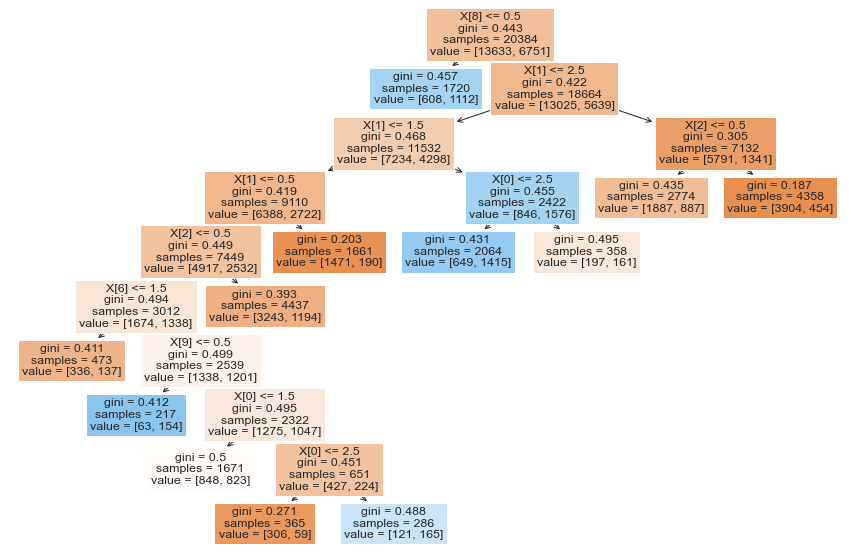

In [83]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [84]:
model.get_depth()

9

Now we could see before pruning our model depth is 47 but now it reduced to 9 . In this way we also reduced the complexity of the model